# Inferential Statistics Practice
* Process to obtain conclusion based on a sample that aims to generalize of the population
* Using Python to apply inferential statistics concepts including sampling disributions,confidence intervals,hypothesis testing,etc

## Coonfidence Intervals


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The function of the syntax np.random.seed(42) 
# to display random output with the same data as others
np.random.seed(42)

In [9]:
coffee_dataset = pd.read_csv("coffee_dataset.csv")
coffee_dataset.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [10]:
coffee_dataset.shape

(2974, 4)

In [11]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200)
# 200 there will display the sample data as much as 200

In [12]:
coffee_red

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


In [13]:
# explore dataset
coffee_red.head()
coffee_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [14]:
# proportion of coffee drinkers in sample
mean_drinker = coffee_red['drinks_coffee'].mean()
mean_non_drinker = 1 - mean_drinker

In [15]:
print(mean_drinker)
print(mean_non_drinker)

0.595
0.405


In [16]:
# average height of coffee drinkers
drinks_height = coffee_red[coffee_red['drinks_coffee']]['height'].mean()

In [17]:
# average height of non coffee drinkers
non_drinks_height = coffee_red[~coffee_red['drinks_coffee']]['height'].mean()
non_drinks_height

66.78492279927877

In [18]:
# bootstrap sample of 200 draws
bootsamp = coffee_red.sample(200,replace=True)
bootsamp['drinks_coffee'].mean()

0.605

(array([  16.,  106.,  590., 1831., 2989., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <BarContainer object of 10 artists>)

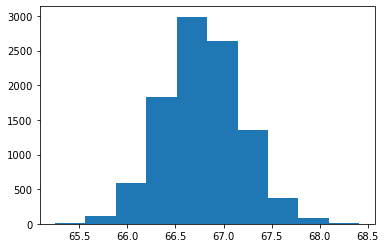

In [19]:
# Bootstrap sample 10,000 times 
boot_means = []
for _ in range (10000):
    bootsamp = coffee_red.sample(200,replace=True)
    mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(mean)
plt.hist (boot_means)

In [20]:
# Obtain 95% confidence interval
np.percentile(boot_means,2.5), np.percentile(boot_means,97.5)

(65.99291328157521, 67.58402738281573)

# Task 1
The difference between replace = False and Replace = True

(array([3.000e+00, 4.900e+01, 3.720e+02, 1.608e+03, 3.123e+03, 2.993e+03,
        1.436e+03, 3.630e+02, 4.600e+01, 7.000e+00]),
 array([65.0634378 , 65.41077637, 65.75811493, 66.1054535 , 66.45279207,
        66.80013064, 67.14746921, 67.49480777, 67.84214634, 68.18948491,
        68.53682348]),
 <BarContainer object of 10 artists>)

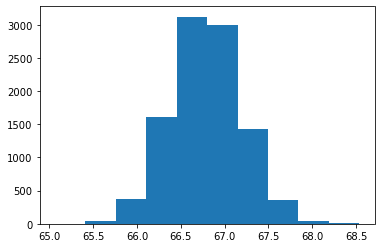

In [21]:
# Bootstrap sample 10,000 times 
boot_means = []
for _ in range (10000):
    bootsamp = coffee_red.sample(200,replace=True)
    mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(mean)
plt.hist (boot_means)

In [22]:
boot_means

[66.54483902806784,
 66.90113706858966,
 66.86050104804973,
 66.58284911521685,
 66.92197330823662,
 66.87036200102445,
 67.44359326562903,
 66.59696823234033,
 66.88170855265251,
 66.73386060192688,
 66.79557436761976,
 67.12207497127405,
 66.83745349480705,
 66.0316405398306,
 66.93594767692785,
 67.06855650196137,
 66.71727029656226,
 67.24432012719994,
 66.84791181284344,
 66.49575400132316,
 66.6300744259605,
 67.05935496312743,
 66.95680653879631,
 66.226613019447,
 66.43880974743188,
 66.61191494312003,
 66.64167215419887,
 67.49662815429011,
 66.57126307954397,
 67.00541922552372,
 66.9901094407212,
 67.10553892585008,
 66.40006839096083,
 66.41830853028642,
 66.51044842713512,
 66.71980682534901,
 66.513903744823,
 67.12769425718585,
 67.53298109310406,
 67.82100879340007,
 66.2700988894029,
 66.87357412369762,
 66.56527680554464,
 66.90326588911819,
 66.59234135513123,
 66.77904918117646,
 66.38499167834996,
 66.5849934807659,
 66.3145301637438,
 66.82425435065711,
 67.021750

(array([4.000e+00, 4.500e+01, 2.270e+02, 8.300e+02, 0.000e+00, 4.541e+03,
        2.307e+03, 1.405e+03, 5.190e+02, 1.220e+02]),
 array([66.7849228, 66.7849228, 66.7849228, 66.7849228, 66.7849228,
        66.7849228, 66.7849228, 66.7849228, 66.7849228, 66.7849228,
        66.7849228]),
 <BarContainer object of 10 artists>)

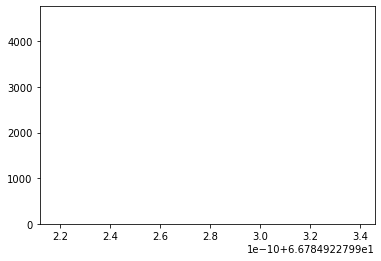

In [23]:
# Bootstrap sample 10,000 times 
boot_means = []
for _ in range (10000):
    bootsamp = coffee_red.sample(200,replace=False)
    mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(mean)
plt.hist (boot_means)

In [24]:
boot_means

[66.7849227992788,
 66.78492279927877,
 66.78492279927879,
 66.78492279927882,
 66.7849227992788,
 66.78492279927882,
 66.78492279927877,
 66.78492279927875,
 66.78492279927875,
 66.78492279927879,
 66.78492279927875,
 66.78492279927879,
 66.78492279927877,
 66.78492279927877,
 66.78492279927879,
 66.78492279927882,
 66.78492279927882,
 66.78492279927877,
 66.78492279927877,
 66.78492279927879,
 66.78492279927877,
 66.78492279927877,
 66.7849227992788,
 66.78492279927879,
 66.78492279927877,
 66.78492279927877,
 66.78492279927879,
 66.78492279927877,
 66.78492279927877,
 66.78492279927877,
 66.78492279927875,
 66.78492279927877,
 66.78492279927877,
 66.78492279927879,
 66.78492279927877,
 66.78492279927877,
 66.78492279927883,
 66.78492279927877,
 66.7849227992788,
 66.78492279927877,
 66.78492279927879,
 66.78492279927877,
 66.78492279927879,
 66.78492279927879,
 66.78492279927877,
 66.78492279927879,
 66.78492279927877,
 66.7849227992788,
 66.78492279927879,
 66.78492279927879,
 66.7